# Simulación de series de datos

- Lo primero que vamos a hacer es cargar los datos de cierre del SPY
- Después calcularemos los retornos logarítmicos

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import funciones as fn

In [12]:
spy= pd.read_csv('data/spy.csv',
                parse_dates=True,
                index_col=0)

In [13]:
spy

,SPY
date,
2016-11-23,220.70
2016-11-25,221.52
2016-11-28,220.48
2016-11-29,220.91
2016-11-30,220.38
...,...
2021-11-16,469.28
2021-11-17,468.14
2021-11-18,469.73


c:\Users\adriy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\adriy\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

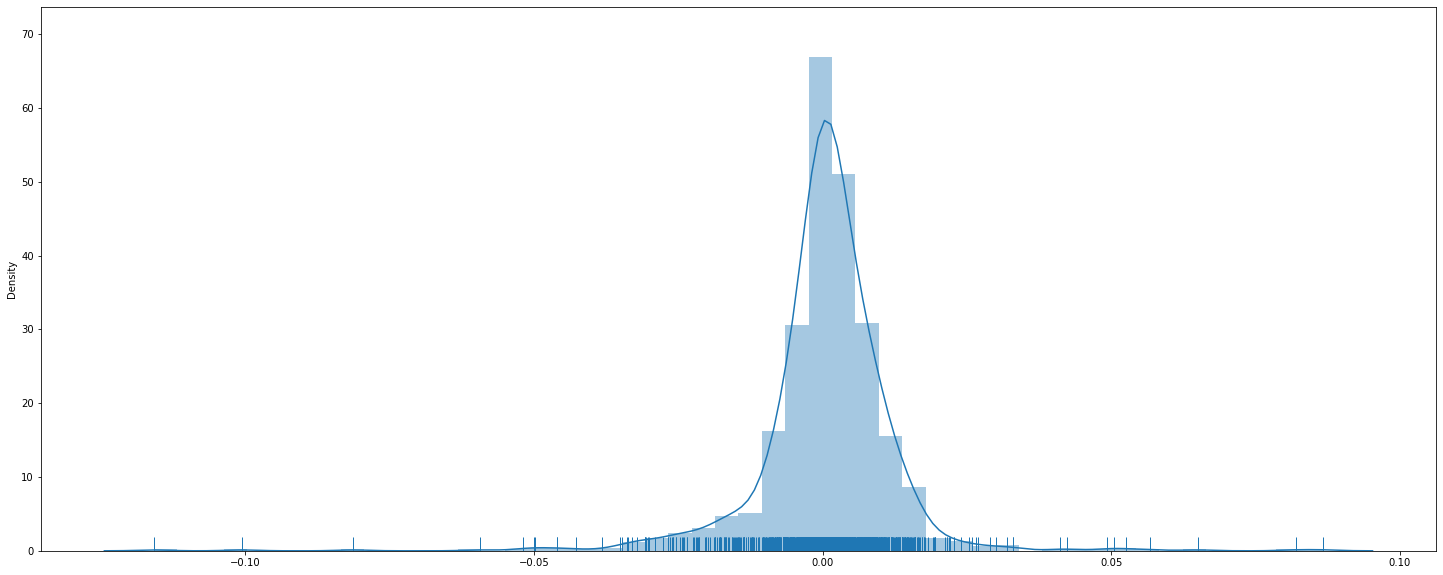

In [14]:
spy_ret_log = np.log(spy).diff()
fig = plt.figure(figsize=(25,10))
sns.distplot(spy_ret_log, rug= True)

## Monte Carlo

Ahora generamos la simulación de montecarlo con la función montecarlo del archivo funciones.py

In [16]:
montecarlo = fn.montecarlo(spy_ret_log)

C:\Users\adriy\AppData\Local\Temp\ipykernel_9476\2837738303.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  montecarlo = fn.montecarlo(spy_ret_log)


## Booststrapping

- En el Bootstrapping simple en vez de generar los retornos de forma aleatoria, realizamos un muestreo aleatorio de los retornos de la serie original

 Ahora generamos la simulación de bootstrapping simple con la función bootstrapping del archivo funciones.py

In [17]:
boots = fn.bootstrapping(spy_ret_log)

C:\Users\adriy\AppData\Local\Temp\ipykernel_9476\1322268161.py:1: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  boots = fn.bootstrapping(spy_ret_log)


## Comparación entre simulaciones

c:\Users\adriy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\adriy\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Simulación Montecarlo')

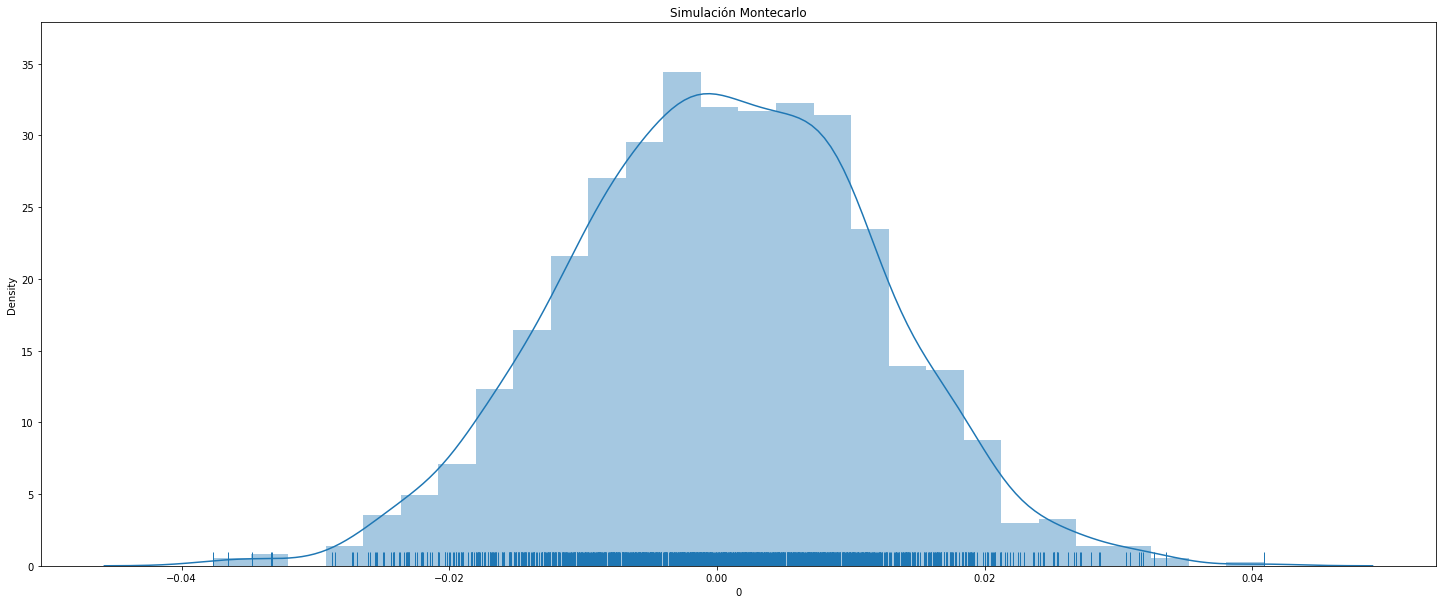

In [22]:
from logging import warning
import warnings


fig = plt.figure(figsize=(25,10))
sns.distplot(montecarlo.iloc[:,0], rug= True).set_title("Simulación Montecarlo")


c:\Users\adriy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\adriy\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Simulación Bootstrapping')

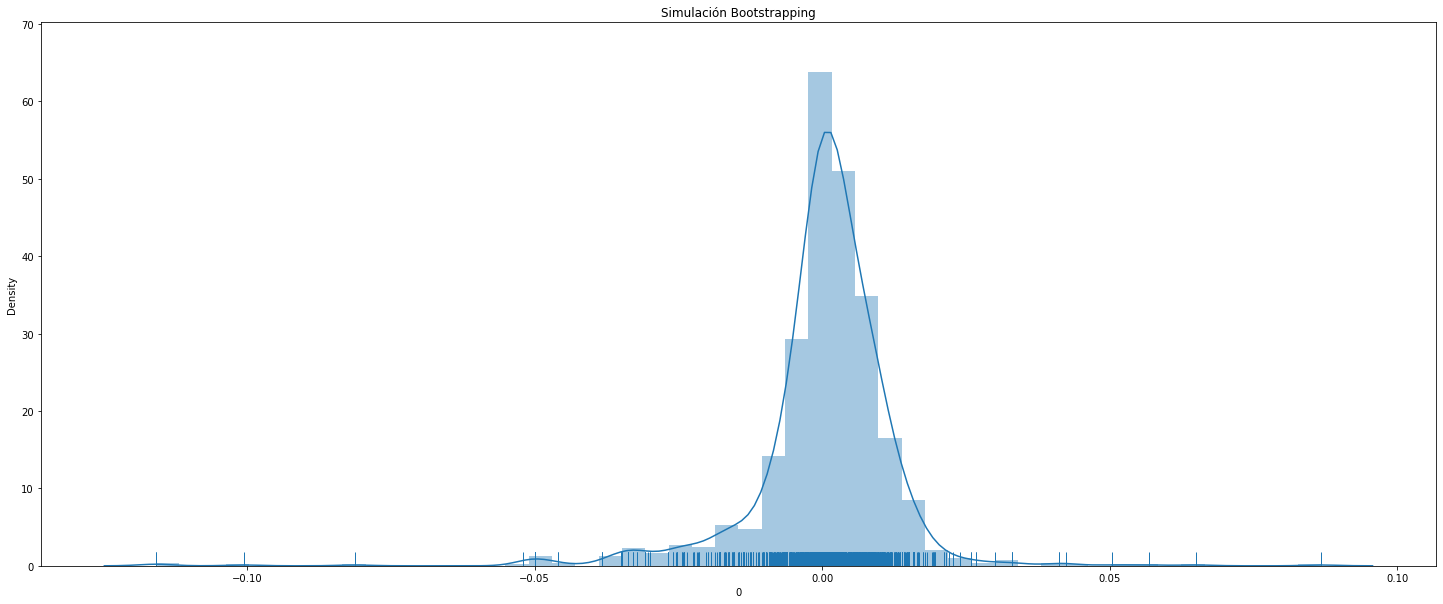

In [23]:
fig = plt.figure(figsize=(25,10))
sns.distplot(boots.iloc[:,0], rug= True).set_title("Simulación Bootstrapping")

### ¿Qué podemos observar?

- La simulación con montecarlo sigue una distribución uniforme, con aproximadamente la misma de cantidad de outlayers positivos que negativos.
- En la simulación con Bootstrapping por el contrario se ve la presencia de los llamados "Cisnes negros", es decir los eventos muy negativos que pueden tener un mayor impacto en nuestra operativa. Así como los outlayers de los mismos son más irregulares, pudiendo en una de las 1000 simulaciones ser notablemente mas negativo que positivo y viceversa

### Vamos a observar la evolución temporal de las simulaciones

In [25]:
montecarlo_temp_evol = montecarlo.cumsum()
montecarlo_temp_evol = np.exp(montecarlo_temp_evol)
boots_temp_evol = boots.cumsum()
boots_temp_evol = np.exp(boots_temp_evol)

### Monte carlo

0

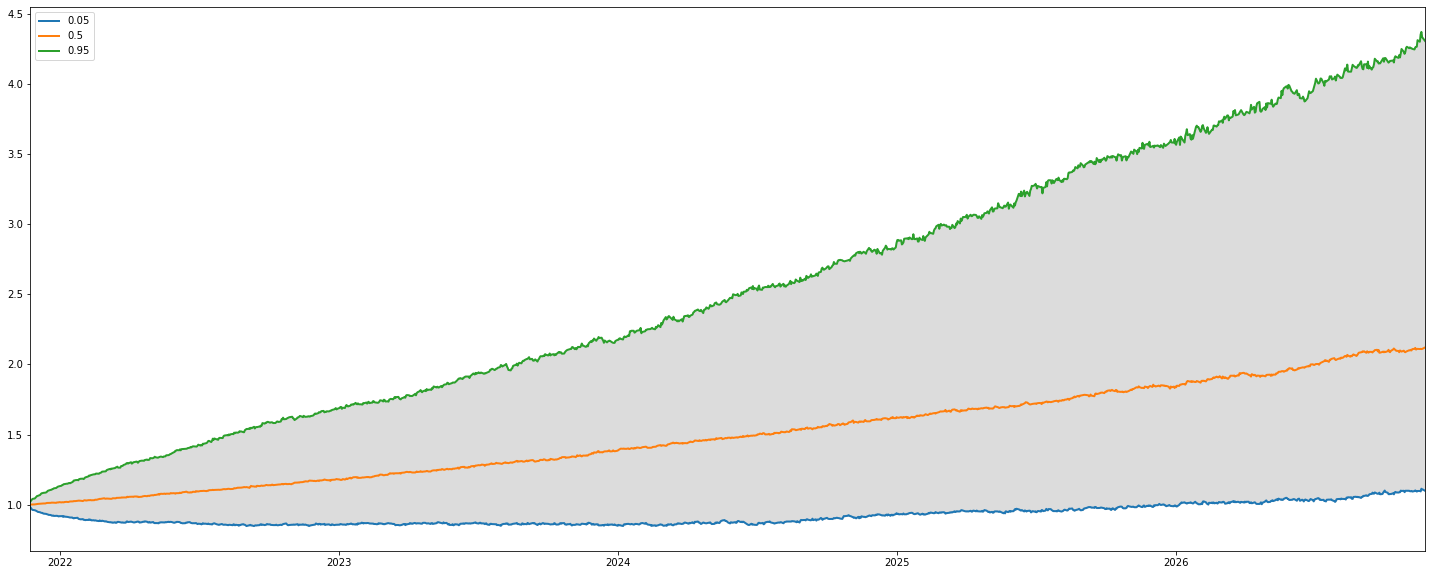

In [26]:
montecarlo_quantile_evol = montecarlo_temp_evol.quantile(q=[0.05,0.5,0.95],axis=1).T
fig = plt.figure(figsize=(25,10))
fn.quantile_plot(montecarlo_quantile_evol)

### Bootstrapping

0

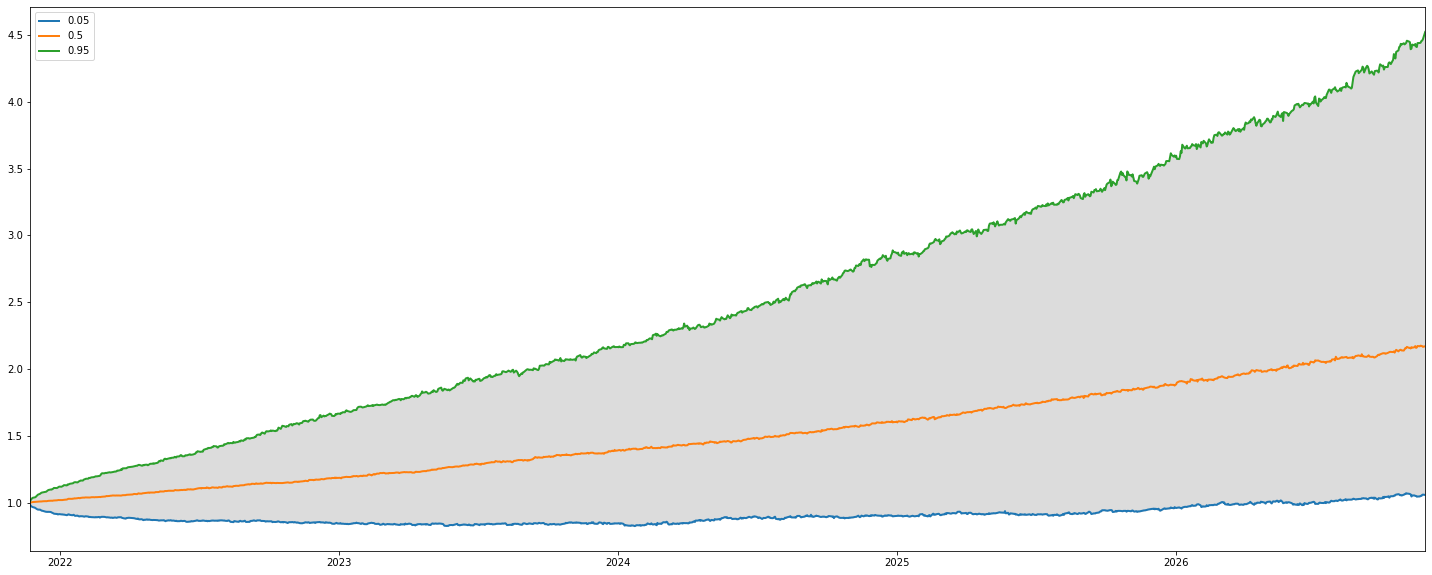

In [27]:
boots_quantile_evol = boots_temp_evol.quantile(q=[0.05,0.5,0.95],axis=1).T
fig = plt.figure(figsize=(25,10))
fn.quantile_plot(boots_quantile_evol)